In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
df = pd.read_csv("AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.shape

(144, 2)

In [6]:
type(df.Month[0])

str

In [7]:
df = pd.read_csv("AirPassengers.csv")
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format=True)
indexdataset = df.set_index(['Month'])

In [8]:
indexdataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
indexdataset.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [12]:
indexdataset.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


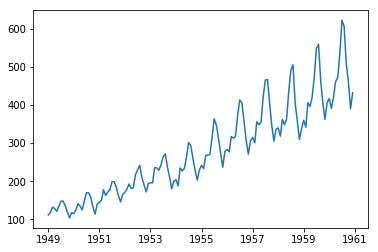

In [14]:
plt.xlabel("Date")
plt.ylabel("Number of Air Pssengers")
%matplotlib inline
plt.plot(indexdataset)

In [23]:
# Data is NOT stationary as mean are not constant
# Two test help to checking stationary of data
#Rolling Strategy
rolmean = indexdataset.rolling(window=12).mean()
rolstd = indexdataset.rolling(window=12).std()
rolmean, rolstd

(            #Passengers
 Month                  
 1949-01-01          NaN
 1949-02-01          NaN
 1949-03-01          NaN
 1949-04-01          NaN
 1949-05-01          NaN
 1949-06-01          NaN
 1949-07-01          NaN
 1949-08-01          NaN
 1949-09-01          NaN
 1949-10-01          NaN
 1949-11-01          NaN
 1949-12-01   126.666667
 1950-01-01   126.916667
 1950-02-01   127.583333
 1950-03-01   128.333333
 1950-04-01   128.833333
 1950-05-01   129.166667
 1950-06-01   130.333333
 1950-07-01   132.166667
 1950-08-01   134.000000
 1950-09-01   135.833333
 1950-10-01   137.000000
 1950-11-01   137.833333
 1950-12-01   139.666667
 1951-01-01   142.166667
 1951-02-01   144.166667
 1951-03-01   147.250000
 1951-04-01   149.583333
 1951-05-01   153.500000
 1951-06-01   155.916667
 ...                 ...
 1958-07-01   376.333333
 1958-08-01   379.500000
 1958-09-01   379.500000
 1958-10-01   380.500000
 1958-11-01   380.916667
 1958-12-01   381.000000
 1959-01-01   382.666667


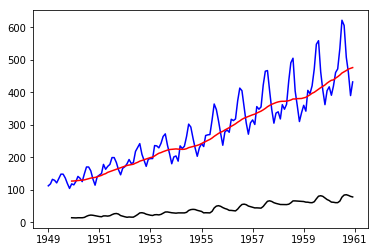

In [26]:
# Plot rolling statistics
orig = plt.plot(indexdataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')


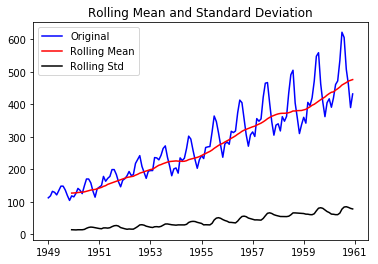

In [28]:
# Plot rolling statistics
orig = plt.plot(indexdataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)

In [30]:
# Perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

print('Result of Dickey-Fuller Test')
dftest = adfuller(indexdataset['#Passengers'], autolag='AIC') # AIC : Chi K Information
dftest


Result of Dickey-Fuller Test


(0.8153688792060433,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.692930839019)

In [33]:
dftest[0:4]

(0.8153688792060433, 0.9918802434376409, 13, 130)

In [34]:
dftest[4]

{'1%': -3.4816817173418295,
 '10%': -2.578770059171598,
 '5%': -2.8840418343195267}

In [36]:
print('Results of Dicky-Fuller Test')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags used','Number of Observation Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dicky-Fuller Test
Test Statistic                  0.815369
p-value                         0.991880
#Lags used                     13.000000
Number of Observation Used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


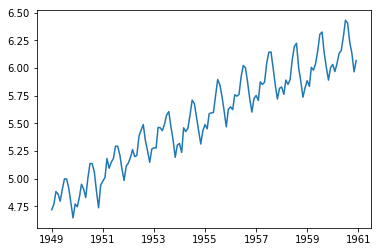

In [37]:
#Estimating Trends
indexdataset_logscale = np.log(indexdataset)
plt.plot(indexdataset_logscale)

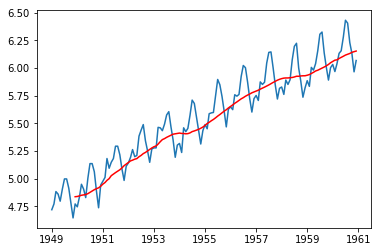

In [41]:
movingAverage = indexdataset_logscale.rolling(window=12).mean()
movingSTD = indexdataset_logscale.rolling(window=12).std()
plt.plot(indexdataset_logscale)
plt.plot(movingAverage, color='red')

In [42]:
dataLogScaleMinusMovingAverage = indexdataset_logscale - movingAverage
dataLogScaleMinusMovingAverage.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [43]:
#Rvmoving NaN Values
dataLogScaleMinusMovingAverage.dropna(inplace=True)
dataLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [ ]:
#https://www.youtube.com/watch?v=e8Yw4alG16Q